In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv('./train.csv')
print(df.shape)

(10081, 785)


In [18]:
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [19]:
df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
data=df.values
print(data.shape)
print(data)

(10081, 785)
[[ 1.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 1.  0.  0. ...  0.  0.  0.]
 ...
 [ 1.  0.  0. ...  0.  0.  0.]
 [ 7.  0.  0. ...  0.  0.  0.]
 [ 9.  0.  0. ... nan nan nan]]


In [13]:
x=data[:,1:]
y=data[:,0] 

print(x.shape,y.shape)

(10081, 784) (10081,)


In [14]:
split=int(0.8*x.shape[0]) #80% of x
print(split)

xtrain=x[:split,:]
ytrain=y[:split]

xtest=x[split:,:]
ytest=y[split:]

print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

8064
(8064, 784) (8064,)
(2017, 784) (2017,)


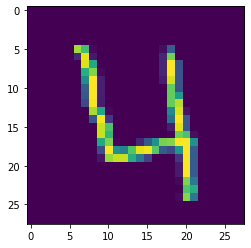

4.0


In [22]:
def draw(sample):
    img=sample.reshape((28,28))
    plt.imshow(img)
    plt.show()
   
draw(xtrain[3])
print(ytrain[3])

In [23]:
#knn

In [24]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))   #x1 and x2 are arr (dist formula)
 
def knn(x,y,query_pnt,k=5):
    vals=[]
    m=x.shape[0]  #no of element
    
    for i in range(m):
        d=dist(query_pnt,x[i])
        vals.append((d,y[i]))
        
    vals=sorted(vals)
    #slicing 0 to k-1
    vals=vals[:k]
    
    vals=np.array(vals)
      #print(vals)
    
    #will return unique classes and their counts
    new_vals=np.unique(vals[:,1],return_counts=True)
      #print(new_vals)
    
    max_freq_i=new_vals[1].argmax()
    pred=new_vals[0][max_freq_i]
    
    return pred

In [29]:
pred=knn(xtrain,ytrain,xtest[2])
print(int(pred))

0


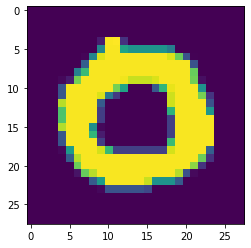

0.0


In [30]:
draw(xtest[2])
print(ytest[2])

In [36]:
correctCase=0
m=xtest.shape[0]

for i in range(100):
    pred=knn(xtrain,ytrain,xtest[i])
    if pred==ytest[i]:
        correctCase+=1;
        
accuracy=(correctCase)/(100)
print(accuracy)

0.96
